<a href="https://colab.research.google.com/github/arvindnswamy/RemoteSensing/blob/development/ExtractingHistogramOfNDWIfromLandsatInEarthEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
from IPython.display import Image

# Trigger the authentication flow.
ee.Authenticate()


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=vWiMNj0VaHe3KveFpHoLzlURIAGi0H0Nqbvqkrd6Eho&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/0AH9_gHYNM_2OkP6EOAUhubNT-PDwd2Iq_4axU3TO3XF7-EnmhRuAcs

Successfully saved authorization token.


In [0]:
ee.Initialize()
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318') # SF Bay area again

ndwi = image.normalizedDifference(['B3', 'B5'])  #Compute ND water index

(array([ 370., 2044., 2295., 1071.,  279.,   39.,   32.,   57., 1261.,
        2533.]),
 array([-0.79375396, -0.6372373 , -0.48072064, -0.32420398, -0.16768732,
        -0.01117067,  0.14534599,  0.30186265,  0.45837931,  0.61489597,
         0.77141263]),
 <a list of 10 Patch objects>)

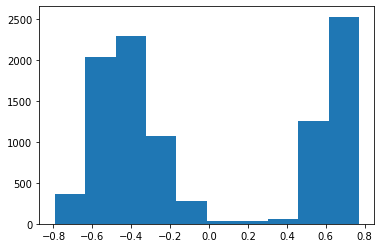

In [3]:
'''
This is a procedure to extract some numerical information from the image.
'''

ndwi_dict = ndwi.sample(numPixels = 10000).reduceColumns(ee.Reducer.toList().repeat(1), ['nd'])
ndwi_list = ee.List(ndwi_dict.get('list'))
ndwi_data = ndwi_list.getInfo()

import matplotlib.pyplot as plt
plt.hist(ndwi_data[0])

In [0]:
imagePath45Row34 = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_045034_20140629') #Image of region adjacent to SF Bay area
#I got the name of this image from the code in the next cell
ndwiPath45Row34 = imagePath45Row34.normalizedDifference(['B3', 'B5'])  #Compute ND water index

In [15]:
parameters = {'min': 0,
              'max': 0.2,
              'dimensions': 768,
              'bands': ['B4', 'B3', 'B2']
}

'''
It turns out that the min and max values are extremely important. Previously, I used the max value of 255 and
higher values, thinking that the max would refer to the DN value of the image I download from USGS. Apparently
not. Instead, when I decreased the value to 1.0 and smaller, I started getting images that are actually visible. 
The max value almost seems like a contrast stretching tool - you've seen contrast stretching in action with GIMP.
When you have max = 0.2, you get a pretty nice image, as shown below.
'''

print(type(imagePath45Row34.getThumbUrl(parameters))) #Image takes a string poining to an image and displays it
print(imagePath45Row34.getThumbUrl(parameters))
Image(url = imagePath45Row34.getThumbUrl(parameters))

<class 'str'>
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/1ce7e834a33e7bd120569aaeafacb581-888d7353bdda374034731e36763885cb:getPixels


In [0]:
'''
This is used to return the names of the images of the region of interest within a time frame of interest.
I chose a single month (June 2014) so that I'll have two images at best.
'''
Path45Row34_collect_return = ee.ImageCollection('LANDSAT/LC08/C01/T1').filter(ee.Filter.eq('WRS_PATH', 45)).filter(ee.Filter.eq('WRS_ROW', 34)).filterDate('2014-06-01', '2014-06-30')

In [13]:
Path45Row34_collect_return.getInfo()

{'bands': [],
 'features': [{'bands': [{'crs': 'EPSG:32610',
     'crs_transform': [30, 0, 326085, 0, -30, 4265415],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [7751, 7881],
     'id': 'B1'},
    {'crs': 'EPSG:32610',
     'crs_transform': [30, 0, 326085, 0, -30, 4265415],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [7751, 7881],
     'id': 'B2'},
    {'crs': 'EPSG:32610',
     'crs_transform': [30, 0, 326085, 0, -30, 4265415],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [7751, 7881],
     'id': 'B3'},
    {'crs': 'EPSG:32610',
     'crs_transform': [30, 0, 326085, 0, -30, 4265415],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [7751, 7881],
     'id': 'B4'},
    {'crs': 'EPSG:326

(array([1.070e+02, 1.540e+02, 7.900e+01, 2.600e+01, 2.100e+01, 8.070e+02,
        5.890e+03, 2.885e+03, 7.000e+00, 5.000e+00]),
 array([-0.71244393, -0.57131737, -0.4301908 , -0.28906424, -0.14793767,
        -0.00681111,  0.13431546,  0.27544203,  0.41656859,  0.55769516,
         0.69882172]),
 <a list of 10 Patch objects>)

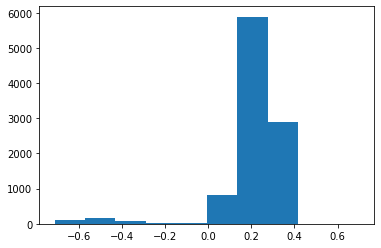

In [18]:
'''
This is a procedure to extract some numerical information from the image. The histogram of a mostly near-coast
water scene.
'''

ndwiPath45Row34_dict = ndwiPath45Row34.sample(numPixels = 10000).reduceColumns(ee.Reducer.toList().repeat(1), ['nd'])
ndwiPath45Row34_list = ee.List(ndwiPath45Row34_dict.get('list'))
ndwiPath45Row34_data = ndwiPath45Row34_list.getInfo()

import matplotlib.pyplot as plt
plt.hist(ndwiPath45Row34_data[0])